In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import utils 
from utils import *
import statsmodels.api as sm

In [2]:
df = pd.read_csv('carga_gw_2020.csv', sep = ';', engine = 'python', header=None)

In [3]:
df.head()

,0,1
0,01/01/2018,"1.264,5"
1,02/01/2018,"1.519,40"
2,03/01/2018,"1.591,30"
3,04/01/2018,"1.588,70"
4,05/01/2018,"1.594,70"


In [4]:
def to_numeric(x): 
    
    x = x.replace(',','.')
    sep = x.split('.')
    
    if len(sep) == 2:
        x = sep[0]+'.'+sep[1]
        
        
    elif len(sep) ==3 :
        x = sep[0]+sep[1]+'.'+sep[2]
    
    else:
        x = 0
    
    x_num = pd.to_numeric(x)

    return  x_num


In [5]:
def preprocess_df(df):
        
    # Determina novos nome de colunas
    df.columns = ["Date", "Carga"]
    
    df.Date = pd.to_datetime(df.Date, dayfirst= True)
    df.dtypes
    
    # Transforma colunas em numericos 
    df['Carga'] = pd.to_numeric(df['Carga'].apply(to_numeric))
    
    
    
    # Associa coluna Date ao index
   # df.index = pd.to_datetime(df.Date, format="%m-%d-%Y")
    # dropa coluna Date extra 
    #df.drop("Date", axis=1, inplace=True)
    
    return df

In [6]:
def fill_na_with_mean(df):
    
    num_cols = len(list(df.columns.values))
    
    for col in range(num_cols):
        
        df.iloc[:,col] = df.iloc[:,col].fillna(df.iloc[:,col].mean())
        
    return df

In [7]:
df = preprocess_df(df)
df = fill_na_with_mean(df)
    
df.head()

,Date,Carga
0,2018-01-01,1264.5
1,2018-01-02,1519.4
2,2018-01-03,1591.3
3,2018-01-04,1588.7
4,2018-01-05,1594.7


In [12]:
dfc = df.iloc[:, 1:2]

In [13]:
arma_mod = sm.tsa.ARMA(dfc, order=(2,2))
arma_res = arma_mod.fit( disp=-1)

In [14]:
arma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Carga   No. Observations:                  912
Model:                     ARMA(2, 2)   Log Likelihood               -5486.210
Method:                       css-mle   S.D. of innovations             99.038
Date:                Sat, 15 Aug 2020   AIC                          10984.420
Time:                        10:07:10   BIC                          11013.314
Sample:                             0   HQIC                         10995.451
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1515.4726     40.164     37.732      0.000    1436.752    1594.194
ar.L1.Carga     0.6998      0.043     16.424      0.000       0.616       0.783
ar.L2.Carga     0.2863      0.041      6.912      0.000       0.205       0.367
ma.L1.Carga    -0.0246      0.027     -0.924      0.356      -0.077       0.028
ma.L2.Carga    -0.7910      0.022    -36.431      0.000      -0.834      -0.748
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0110           +0.0000j            1.0110            0.0000
AR.2           -3.4553           +0.0000j            3.4553            0.5000
MA.1            1.1090           +0.0000j            1.1090            0.0000
MA.2           -1.1401           +0.0000j            1.1401            0.5000
-----------------------------------------------------------------------------
"""

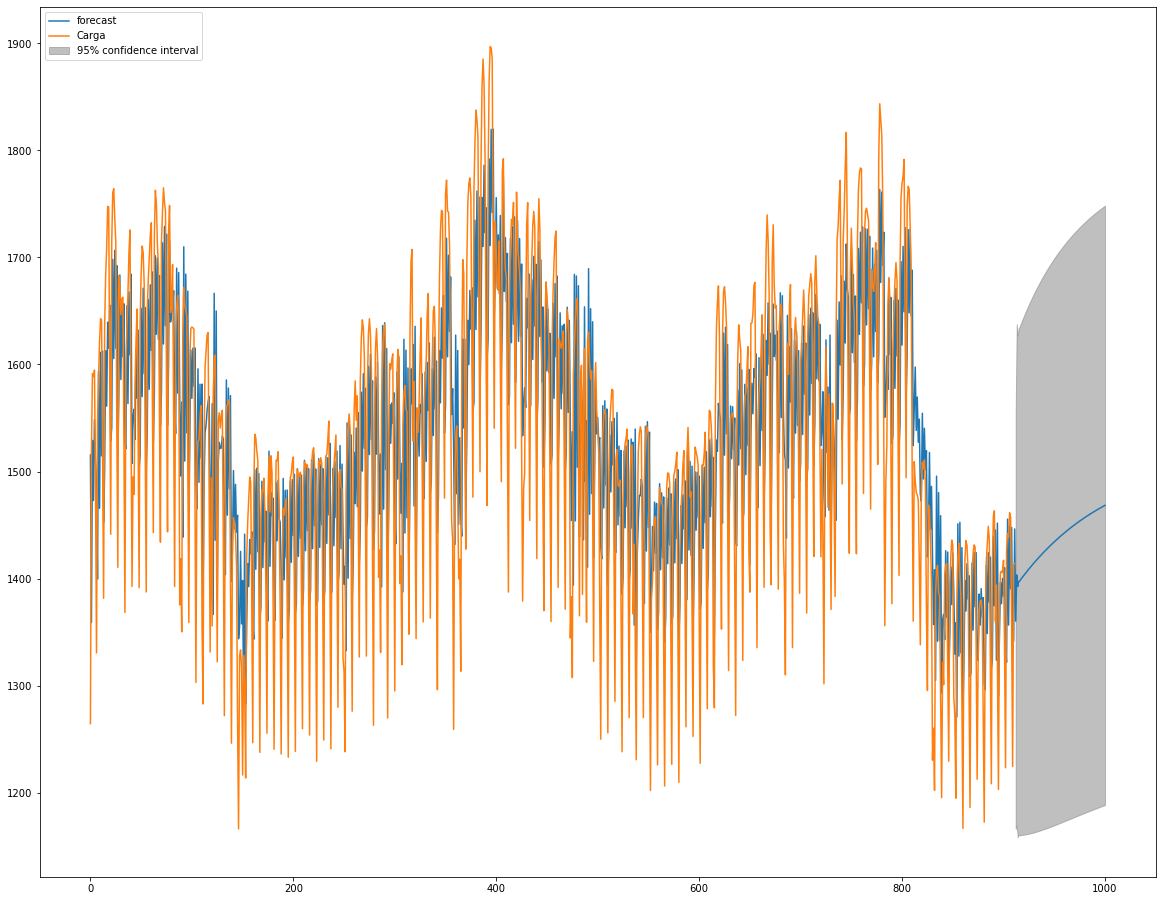

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,16))
#ax = dfc.loc['2018-1-1':].plot(ax=ax)
fig = arma_res.plot_predict(start= 0, end= 1000, ax=ax)
legend = ax.legend(loc='upper left')